# L03_dataset
## Introduction
This exercise will focus on different datasets such as the MOON, MNIST, IRIS and the Path of Exile dataset of the Harbinger League. Path of Exile is a video gamer developed by GGG and who offer through their API a dataset of their current "League" which has around ~60000 data with several arguments.

## Vanilla Datasets

#### Qa Data load function 

We begin with a 100% synthetic dataset called moon. It creates two interleaved half-moon like datasets, and is frequently used as an XOR-like problem set (especially in Deep Learning).  

Create a `MOON_GetDataSet()` that generates moon data, based on Scikit-learn's `make_moon()` function.

Extend the `MOON_GetDataSet()`function signature to include some of the parameters found in `make_moon()`, like 'n_sample'.

Also create a `MOON_Plot()` function, that plots the data...good thing here is that the feature set is 2D and easy to handle!
##### Qa implementation

X.shape= (1000, 2) , y.shape= (1000,)


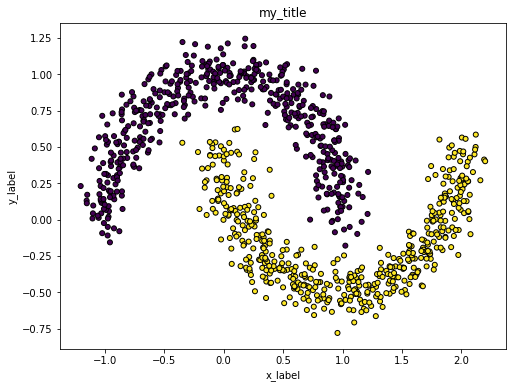

In [1]:
# Assignment Qa: 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

def MOON_GetDataSet(n_samples):
    return make_moons(n_samples, noise = 0.1)

def MOON_Plot(X, y,title="my_title", xlabel="x_label", ylabel="y_label"):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)   
                                 
# TEST CODE:
X, y=MOON_GetDataSet(n_samples=1000)
print("X.shape=",X.shape,", y.shape=",y.shape)
MOON_Plot(X,y)

##### Qa results
The moon dataset have been successfully retrieved at printed. It's important to note that the noise argument in make_moons(noise = 0.1) defines noise-separation between the points and the perfect plot.

#### Qb Try it with a  train-test split function

Now, use a train-test split function from Scikit-learn, that is able to split a `(X, y)` dataset tuple into a train-set and a test-set. 

Plot the train and test data using your `MOON_Plot` function.

Extend the plot function to add a plot title and x- and y-labels to the plot, say as default parameters

```python 
def MOON_Plot(X, y, title="my title", xlable="", ylabel=""):
    # implementation here...
```

or similar. Use the titles "train" and "test" when plotting the train and test data.

##### Qb implementation

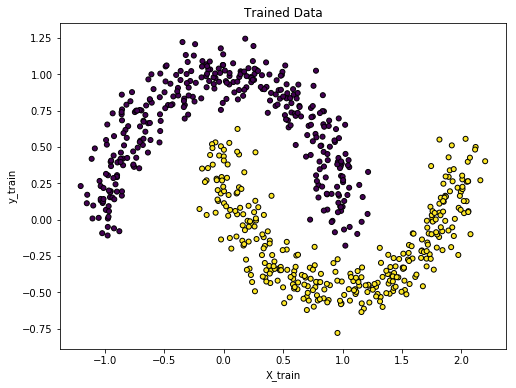

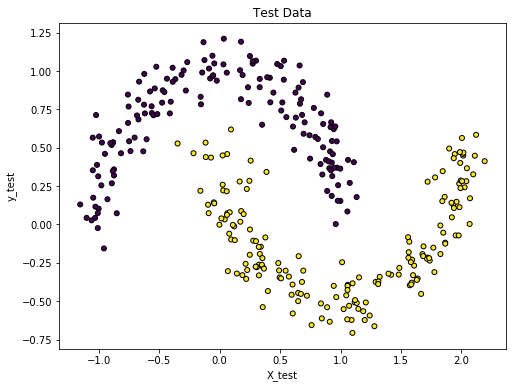

In [3]:
# Assignment Qb:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
MOON_Plot(X_train,y_train,'Trained Data', 'X_train', 'y_train')
MOON_Plot(X_test,y_test,'Test Data', 'X_test', 'y_test')


##### Qb results
The two plots show the difference of the trained and tested data. The main conclusion here is of course the test data set size has been set to 33% of the data, thus there are fewer points.

### MNIST

#### Qc Data load function 

Now for the MNIST data set, creating an easy to use data-loader, `MNIST_GetDataSet()`.

There are several ways of getting the MNIST dataset. You could base the data loader on the `fetch_mldata('MNIST original')` function or try to use the `keras.datasets.mnist.load_data()` function. 

The later function pre-splits into a train-test set, and to be compatible with the former, you must concatenate the train-test and return a plain `X, y` set. 

Also create a `MNIST_PlotDigit()`, that is able to plot a single digit from the dataset, and try to plot some of the digits in the dataset (set TEST CODE below).

##### Qc implementation

X.shape= (70000, 784) , y.shape= (70000,)
X_train.shape= (50000, 784) , X_test.shape= (20000, 784)


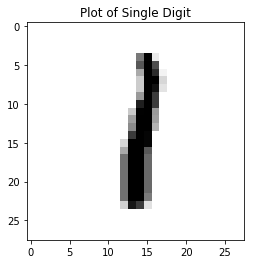

In [6]:
## Assignment Qc:

# Note we are using fetch_openml which is the newer version of fetch_mldata
from sklearn.datasets import fetch_openml
#from keras.datasets import mnist

# Function to plot a single digit
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(255-image, cmap='gray')
    plt.title('Plot of Single Digit')  


# Function to return mnist dataset as X-y tuple
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    return (X, y)

# TEST CODE:
X, y = MNIST_GetDataSet()
print("X.shape=",X.shape, ", y.shape=",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, shuffle=True)

print("X_train.shape=",X_train.shape,", X_test.shape=",X_test.shape)
MNIST_PlotDigit(X_train[12])

##### Qc results
With the use of the mnist dataset given from sklearn.datasets.fetch_openml, we were able to implement a function that is able to print a single digit of the mnist dataset.

## Iris
#### Qd Data load function 

Creating the iris data loader, `IRIS_GetDataSet()`, this time we use the iris loader located in `sklearn.datasets.load_iris()`.
##### Qd implementation

In [8]:
# Assignment Qd
from sklearn.datasets import load_iris

def IRIS_GetDataSet():
    return load_iris()

##### Qd results
With the use of sklearn.datasets.load_iris() we were able to successfully create a function to retrieve the data. In the next assignment, we show how to use the iris dataset.

#### Qe Examine the data via scatter plots

Now, as a data-scientist, it is always good to get some grasp on how your data looks like. For the iris data we now want to plot some of the features-against-some-of-the other-features to see how they separate in the given 2D-feature space.

A scatter plot for all iris features against all other may look like

<img src="Figs/Iris_dataset_scatterplot.svg.png" style="width:400px">

Create a plot function that takes just two feature dimensions and plots them in a 2D plot, and plot all features against all others (resembling the "Iris Data" scatter plot just above).

##### Qe implementation

Text(0.5, 0.98, 'IRIS Data for 2 features, unit = (cm)')

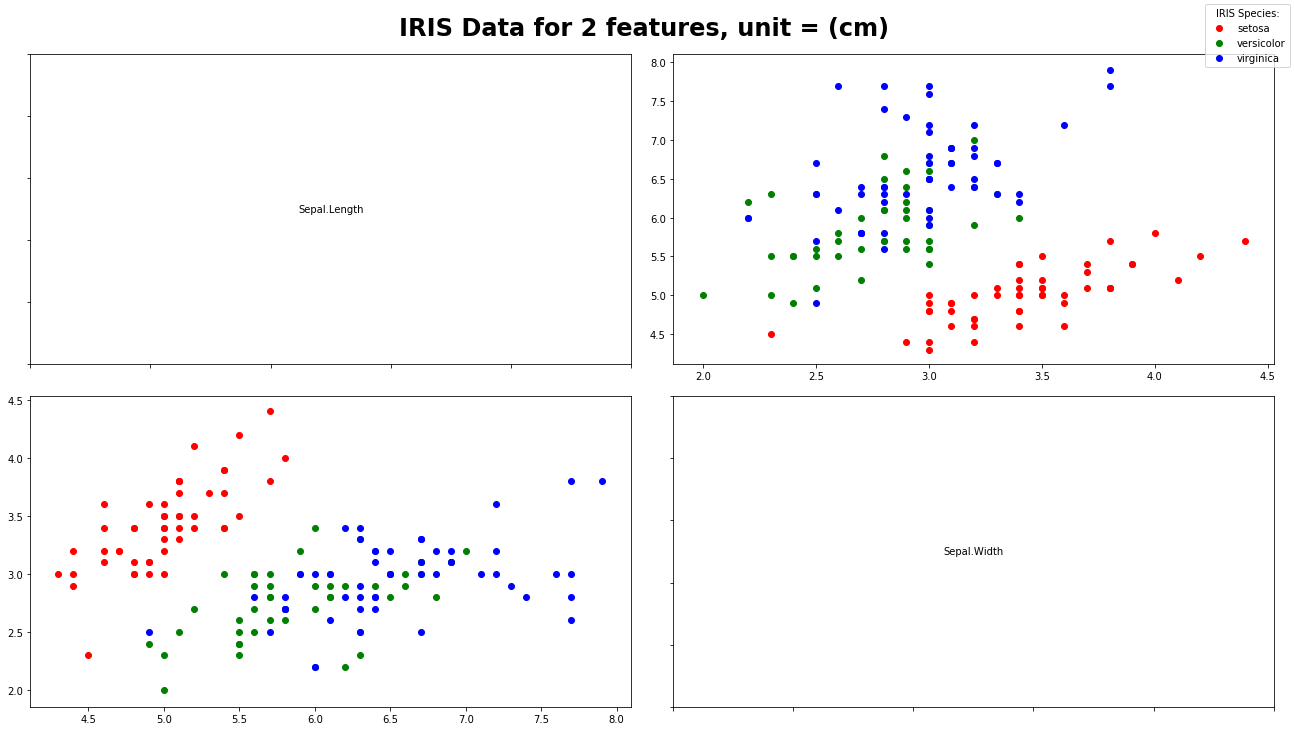

In [10]:
# Assignment Qe:
def IRIS_Plot2D(iris_data, features=2, feat1=None, feat2=None, ax=None):
    # Check for Subplots
    if ax is None:
        ax = plt.gca()
        
    # Retrieve IRIS data with amount of features
    X = iris_data.data[:, :features]
    y = iris_data.target
    
    # Set and return IRIS data with setosa, versicolor and virginica
    # feat1 & feat2: 0 = Sepal.Length, 1 = Sepal.Width, 2 = Petal.Length, 3 = Petal.Width
    setosa = ax.scatter(X[:50,feat1], X[:50,feat2], c='red', label='setosa', marker='o')
    versicolor = ax.scatter(X[50:100,feat1], X[50:100,feat2], c="green", label = 'versicolor', marker='o')
    virginica = ax.scatter(X[100:,feat1], X[100:,feat2], c="blue", label ='virginica', marker='o')
    
    return setosa, versicolor, virginica

# Function that plots text in the center of the graph
def PlotTextCenter(str, ax=None):
    # Check for subplots
    if ax is None:
        ax = plt.gca()
        
    # Disable x- and y-axis number ticks
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    return ax.text(0.5, 0.5, str, horizontalalignment='center',verticalalignment='center')


# Get IRIS Data from Qd
iris = IRIS_GetDataSet()

# Prepare subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 10.5)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot IRIS Data with 2 features
features = 2

PlotTextCenter("Sepal.Length",axes[0,0])
PlotTextCenter("Sepal.Width",axes[1,1])

IRIS_Plot2D(iris,features,1,0,axes[0,1])
IRIS_Plot2D(iris,features,0,1,axes[1,0])

iris_labels = ["setosa", "versicolor", "virginica"]
fig.legend(labels=iris_labels, title="IRIS Species:")
fig.suptitle('IRIS Data for 2 features, unit = (cm)', fontsize=24, fontweight='bold')

##### Qe results
The plot shows the IRIS dataset in use with the two features being Sepal.Length vs Sepal.Width. Looking closely, we can conclude that these two features plottet against each other resemble the original figure introduced in Qe. Furthemore, expanding these functions to work with 4 features to include Petal.Length and Petal.Width would not be too hard as it has been constructed with care.

#### Qf Add your function to the `libitmal` python module

Add all your moon, MNIST and iris get and plot functions to the `libitmal` module. Call the file `dataloaders.py`, and test it in a ___new___ jupyter notebook (you need to reset the notebooks to be able to see if you are calling _cached_ version of the functions or the new ones, with similar names, in the lib module).

You will use these data loaders later, when we want to train on small datasets.

##### Qf implementation

In [14]:
# Assignment Qf
# We placed the path in: libitmal/dataloaders.py

# Create a new jupyter notebook for instance: L03_dataset_Qf_tester.ipynb, to test if dataloaders.py works.
# Remember to restart kernel

# Succesfully tested.

##### Qf results
While the code is commmented, the file for dataloaders.py has been attached as appendix. In order to use it, the user must restart kernel and then import the library. We tested it in a separate document with success.

## Your Datasets
#### Qg Download a data set and do some data exploration of it

You are now a Data Scientist, go an examine your data, perhaps creating some feature scatter plots, just like the ones we just made for iris...

Are there `null`s or not-a-number data in your set? Do you have to filter these out before training?

Try to train-test split the set, perhaps just on a small set of its feature depending on the size of your data (small/medium/large/big), and try out one or two Scikit-learn ML algorithms on it just to see if it is possible.

(We return to the data set and training later...)

##### Qg implementation

In [16]:
# Assignment Qg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dataset: https://www.kaggle.com/gagazet/path-of-exile-league-statistic#poe_stats.csv
# Tutorial: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/
# Inspiration for PoE dataset: https://www.kaggle.com/microtang/poe-path-of-exile-statistics-an-exploration
# Subject: Path of Exile (PoE) video game developed by Grinding Gear Games

# Read dataset from csv file
df = pd.read_csv('poe_stats.csv', delimiter = ',')
df.head(5)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger


In [18]:
# Check out how many players on each ladder
df_ladder = df.groupby('ladder')
df_ladder.size()

ladder
Harbinger             14918
Hardcore Harbinger    14905
SSF Harbinger         14981
SSF Harbinger HC      14972
dtype: int64

We can observe that SSF Harbinger is the most populated Ladder with 14981 players, followed by SSF Harbinger HC which has 14972 players.

In [19]:
# Function to get Ordered Classes in a League
def GetOrderedClassInLadder(ladder):
    # Get Ladder Class grouped by class
    mLadder = df_ladder.get_group(ladder).groupby('class')
    
    # Arrange Ordered data by Class and Number of classes
    mOrderedData = pd.DataFrame(0, index=np.arange(len(mLadder.size())), columns=['class','number'])
    mOrderedData['class'] = mLadder.size().index
    
    # Loop through all data and sort class with number of classes
    for i in range(len(mOrderedData)):
        mOrderedData.iat[i,1] =  int(mLadder.size()[i])
    mOrderedData = mOrderedData.sort_values(by = 'number', ascending=False)
    return mOrderedData

GetOrderedClassInLadder('SSF Harbinger HC').head()

,class,number
14,Necromancer,2055
2,Berserker,1644
8,Gladiator,1576
22,Slayer,1135
24,Trickster,1058


Necromancer is the most popular class in SSF Harbinger HC Ladder with 2055 players. We will compare the amount of classes in each Ladder later.

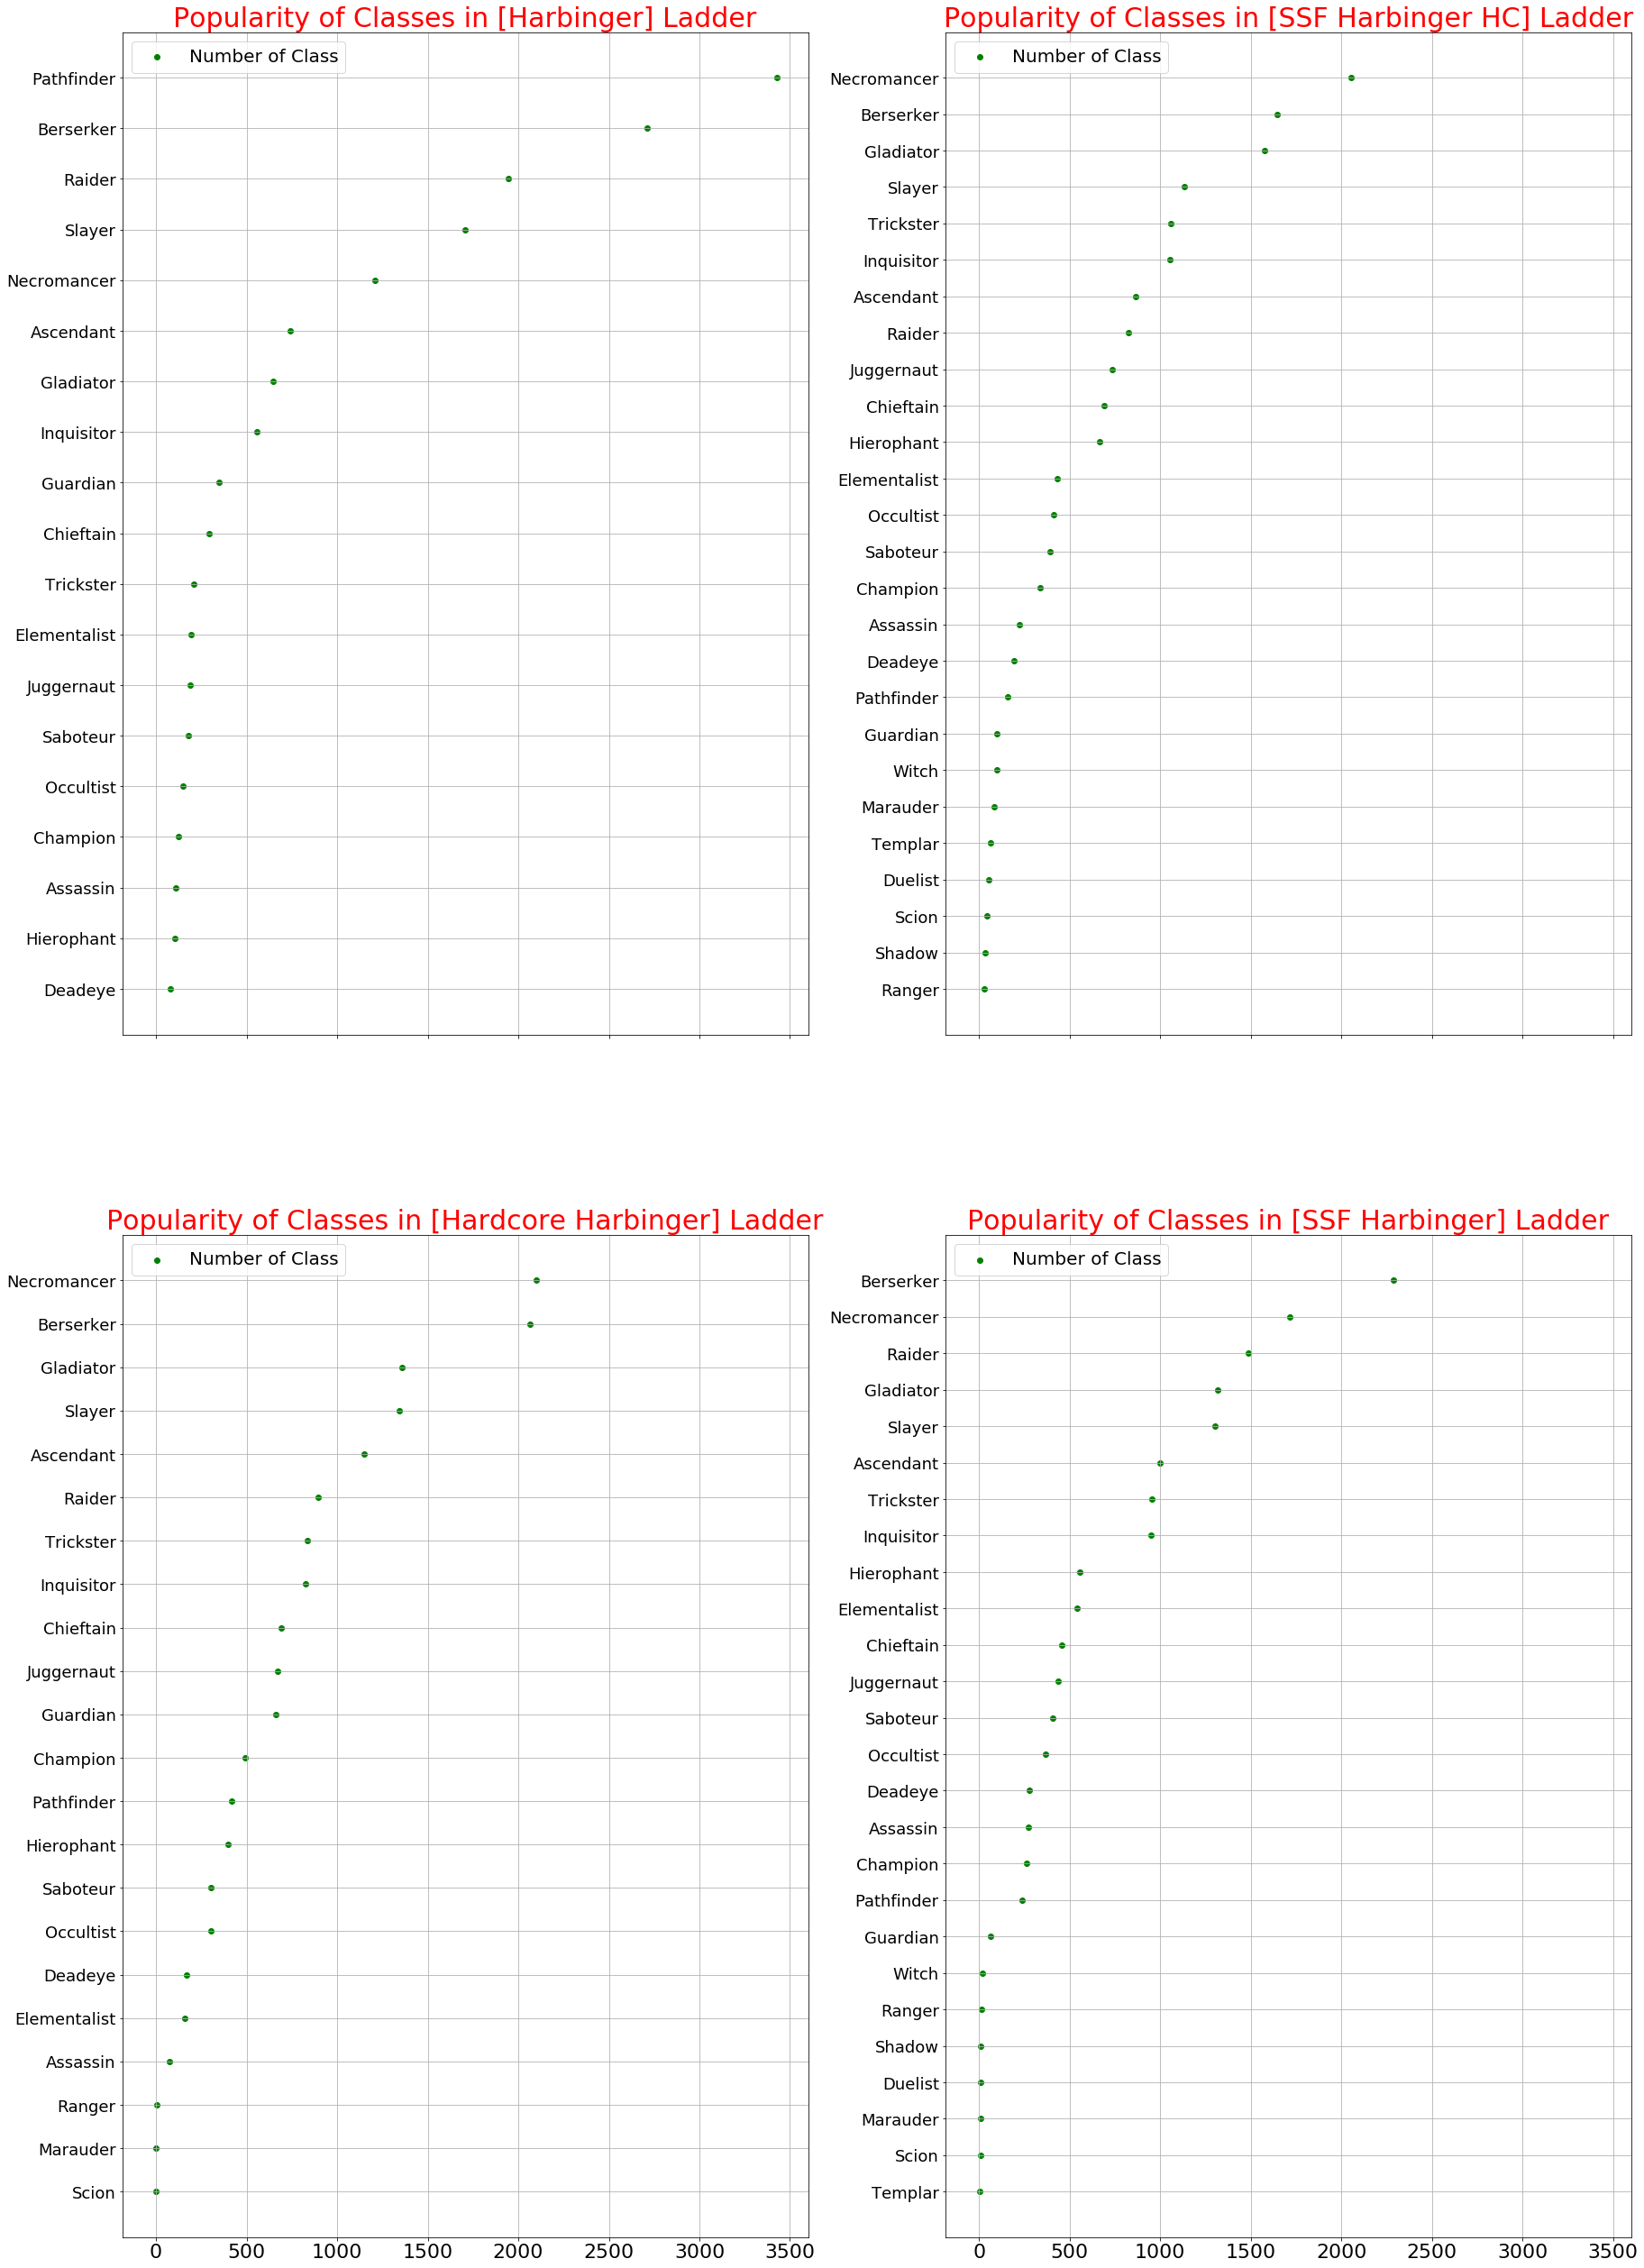

In [10]:
# Function to plot the popularity of classes in each ladder.
def POE_PlotClassVsLadder():
    f, axes = plt.subplots(2, 2, figsize=(30,45), sharex=True)
    mLadderList = df['ladder'].unique()
    mCounter = 0
    for i in range(2):
        for j in range(2):
            plt.sca(axes[i, j])
            currentLadder = mLadderList[mCounter]
            ladderData = GetOrderedClassInLadder(currentLadder)
            ladderData = ladderData.reset_index()
            x = ladderData['number']
            y = ladderData['class']
            labels = ladderData['class']
            plt.scatter(x, y, c='g', label = 'Number of Class')
            plt.xticks(size = 22)
            plt.yticks(y, labels, fontsize=18)
            plt.title('Popularity of Classes in ['+ currentLadder +'] Ladder', fontsize = 30, color = 'red')
            plt.legend(loc=2, fontsize =20)
            plt.grid()
            plt.gca().invert_yaxis()
            mCounter += 1
    plt.show()
    return

POE_PlotClassVsLadder()

The popularity of the Necromancer and Berserker class is very high in each Ladder while the Pathfinder is only popular in the Harbinger Ladder.

Next action is to do a train-split of the data with sklearn.model_selection.train_test_split()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


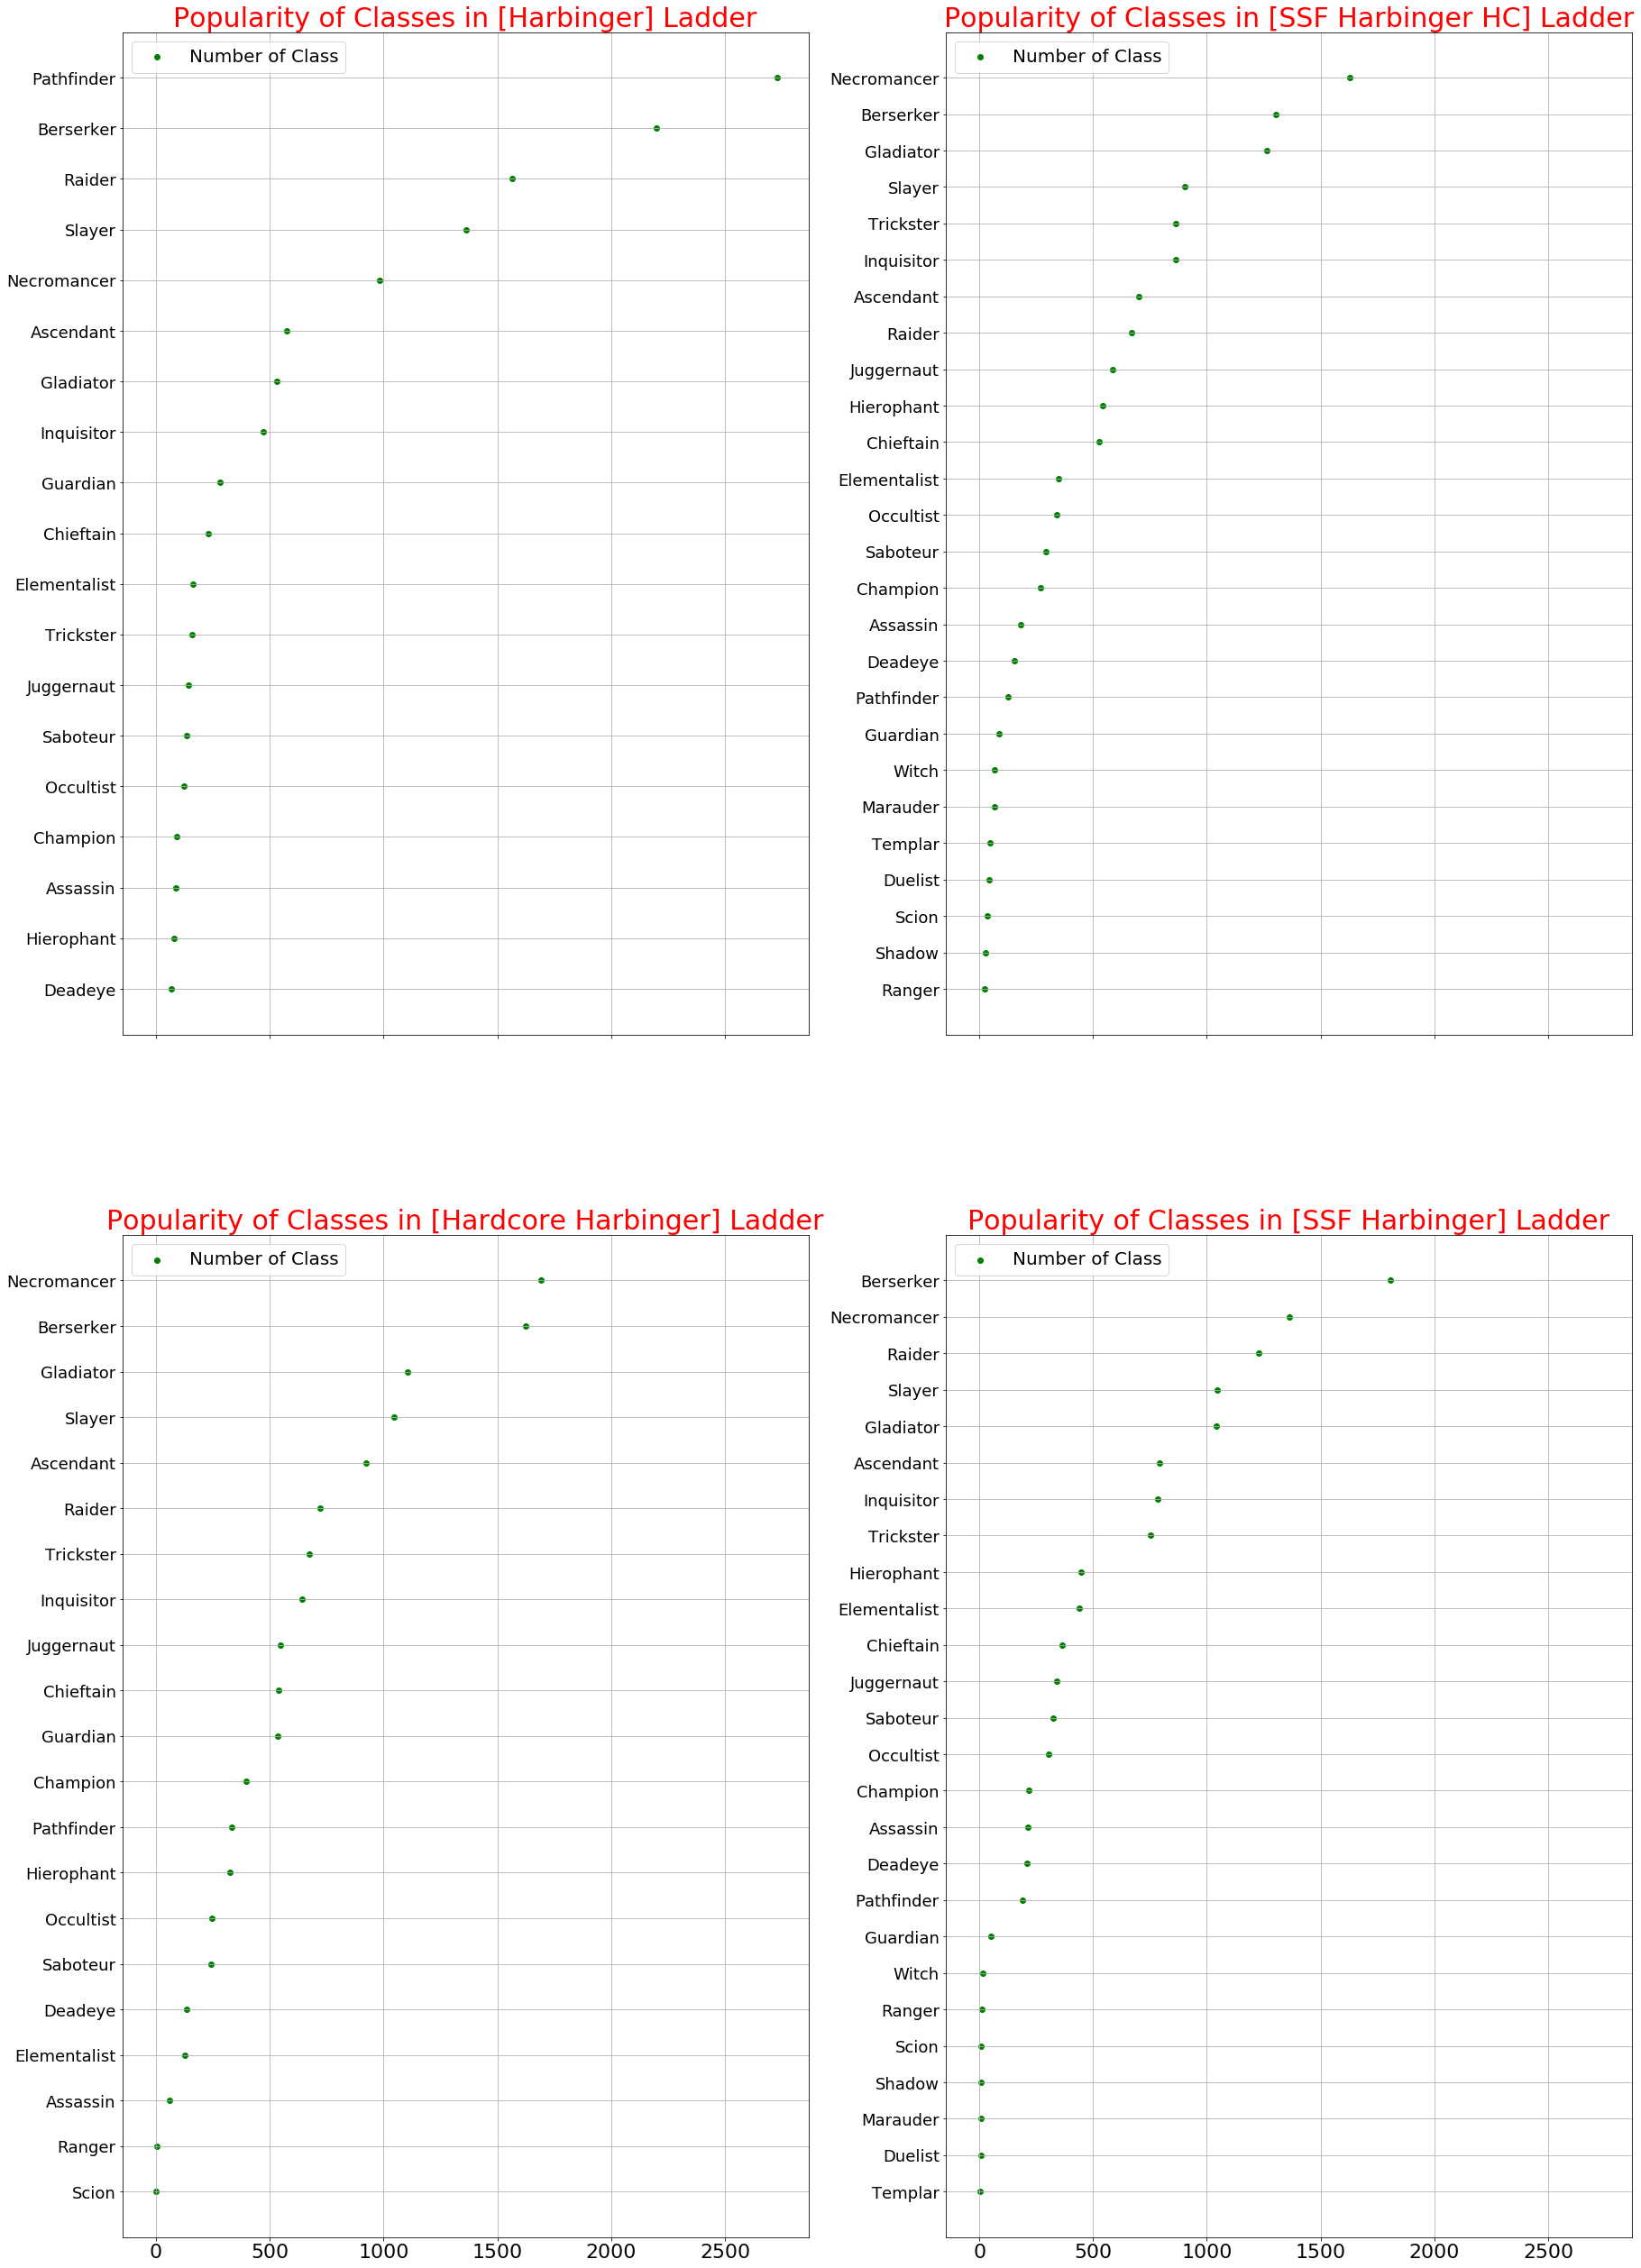

In [20]:
def Train_GetOrderedClassInLadder(ladder):
    # Get Ladder Class grouped by class
    mLadder = df_train_ladder.get_group(ladder).groupby('class')
    
    # Arrange Ordered data by Class and Number of classes
    mOrderedData = pd.DataFrame(0, index=np.arange(len(mLadder.size())), columns=['class','number'])
    mOrderedData['class'] = mLadder.size().index
    
    # Loop through all data and sort class with number of classes
    for i in range(len(mOrderedData)):
        mOrderedData.iat[i,1] =  int(mLadder.size()[i])
    mOrderedData = mOrderedData.sort_values(by = 'number', ascending=False)
    return mOrderedData

# Switch-Case function to ensure same order of Ladder plots as shown previously
def switch_ladder(arg):
    switch_case = {
        0: "Harbinger",
        1: "SSF Harbinger HC",
        2: "Hardcore Harbinger",
        3: "SSF Harbinger",
    }
    return switch_case.get(arg)


def Train_POE_PlotClassVsLadder():
    f, axes = plt.subplots(2, 2, figsize=(30,45), sharex=True)
    mLadderList = df_train['ladder'].unique()
    mCounter = 0
    for i in range(2):
        for j in range(2):
            plt.sca(axes[i, j])
            currentLadder = switch_ladder(mCounter);
            ladderData = Train_GetOrderedClassInLadder(currentLadder)
            ladderData = ladderData.reset_index()
            x = ladderData['number']
            y = ladderData['class']
            labels = ladderData['class']
            plt.scatter(x, y, c='g', label = 'Number of Class')
            plt.xticks(size = 22)
            plt.yticks(y, labels, fontsize=18)
            plt.title('Popularity of Classes in ['+ currentLadder +'] Ladder', fontsize = 30, color = 'red')
            plt.legend(loc=2, fontsize =20)
            plt.grid()
            plt.gca().invert_yaxis()
            mCounter += 1
    plt.show()
    return

df_filter = df[['class','ladder']]
df_train, df_test = train_test_split(df_filter, train_size = 0.8, shuffle=True)
df_train_ladder = df_train.groupby('ladder')
Train_POE_PlotClassVsLadder()

The four plots show the trained data where the train_size is 80%.

##### Qg results
The Path of Exile dataset offer ~60000 data of players in the game. We have successfully experimented with the dataset and made plots of Class vs Amount-of-Classes. Furthermore, we used sklearns train_and_split function, where the difference between the positions of the classes changed a bit.

## Conclusion
We have successfully retrieved and used datasets for MOON, MNIST and IRIS. Furthermore, we were able to experiment with the Path of Exil dataset which has lead to some basic conclusion of the difference of classes played in the Harbinger Leagues.